Cea mai probabila secventa de dificultati:  ['usor', 'usor', 'dificil', 'usor', 'dificil', 'mediu', 'dificil', 'usor', 'dificil', 'usor', 'dificil', 'mediu']
Probabiilitatea acesteia:  7.32594289717248e-08


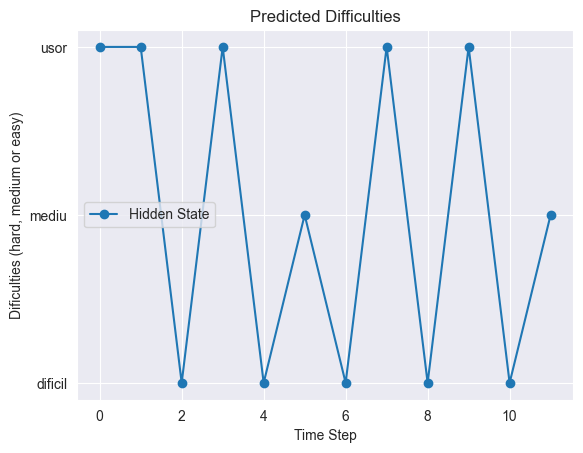

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


states = ["dificil", "mediu", "usor"]
n_states = len(states)

observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)


transition_matrix = np.array([
    [0, 0.5, 0.5],   
    [0.5, 0.25, 0.25],  
    [0.5, 0.25, 0.25]   
])
emission_matrix = np.array([
    [0.1, 0.2, 0.4, 0.3],  
    [0.15, 0.25, 0.5, 0.1], 
    [0.2, 0.3, 0.4, 0.1]   
])


start_probabilities = np.array([1/3, 1/3, 1/3])


model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probabilities
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

observed_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]).reshape(-1, 1)  # FB=0, B=1, S=2, NS=3



hidden_states = model.predict(observed_sequence)
better_visual = [states[val] for val in hidden_states]

log_prob = model.score(observed_sequence)
probability = np.exp(log_prob)


print("Cea mai probabila secventa de dificultati: ", better_visual)
print("Probabiilitatea acesteia: ", probability)


sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Dificulties (hard, medium or easy)")
plt.yticks(ticks=range(n_states), labels=states)
plt.legend()
plt.title("Predicted Difficulties")
plt.show()

